Here, we are trying to visually analyze the median rent prices per square feet of different types of residences from various San Diego County Zip Codes. The data includes historical data on one to three bedroom houses as well as condos from within the past few years.

In [3]:
#import key modules
import numpy as np
import pandas as pd

#file names
file1 = 'Median Rent Price per sq ft 1 Bedrm.csv'
file2 = 'Median Rent Price per sq ft 2 Bedrm.csv'
file3 = 'Median Rent Price per sq ft 3 Bedrm.csv'
file4 = 'Median Rent Price per sq ft Condo.csv'

def setup(fname):
    '''
    takes .csv file name and reads it as a dataframe
    then sorts columns by Zip Code and replaces NaN
    values with 0
    
    :param fname: file name
    :type fname: str ending with '.csv'
    '''
    
    assert isinstance(fname,basestring)
    assert fname[-4:]=='.csv'
    
    df=pd.read_csv(fname)
    df=df.sort_values('RegionName')
    df=df.drop(['City', 'State', 'Metro', 'SizeRank', 'CountyName'],axis=1)
    return df

#pass each file through function to produce four dataframes
df1=setup(file1)
df2=setup(file2)
df3=setup(file3)
df4=setup(file4)

In [4]:
def commonzips(dflist):
    '''
    finds the common zip codes with data specified in all 
    the dataframes contained in a list given as an input
    
    :param:  dflist
    :type: list of dataframes
    '''
    
    assert isinstance(dflist, list)
    assert len(dflist) > 1
    
    ziplist=list(set(dflist[0].RegionName))
    for i in range(len(dflist)):
        assert isinstance(dflist[i],pd.DataFrame)
        ziplist=list(set(ziplist) & set(dflist[i].RegionName))
    ziplist.sort()
    return ziplist

#make list of four dataframes and pass it to function
dflist=[df1,df2,df3,df4]
zips=commonzips(dflist)

In [5]:
def moresetup(df, zips):
    '''
    reducing dataframe rows to only include the ones
    whose zip codes are found in zips and also getting
    rid of columns that contain only NaN values
    
    :param:  df
    :type: dataframe
    :param: zips
    :type: list of integer 5-digit zip codes
    '''
    
    assert isinstance(df, pd.DataFrame) and isinstance(zips, list)
    for i in zips:
        assert 10000<=i<=99999
        
    df=df[df.RegionName.isin(zips)]
    df=df.dropna(axis=1, how='all')
    return df

#update each dataframe using this most recent function
df1=moresetup(df1,zips)
df2=moresetup(df2,zips)
df3=moresetup(df3,zips)
df4=moresetup(df4,zips)

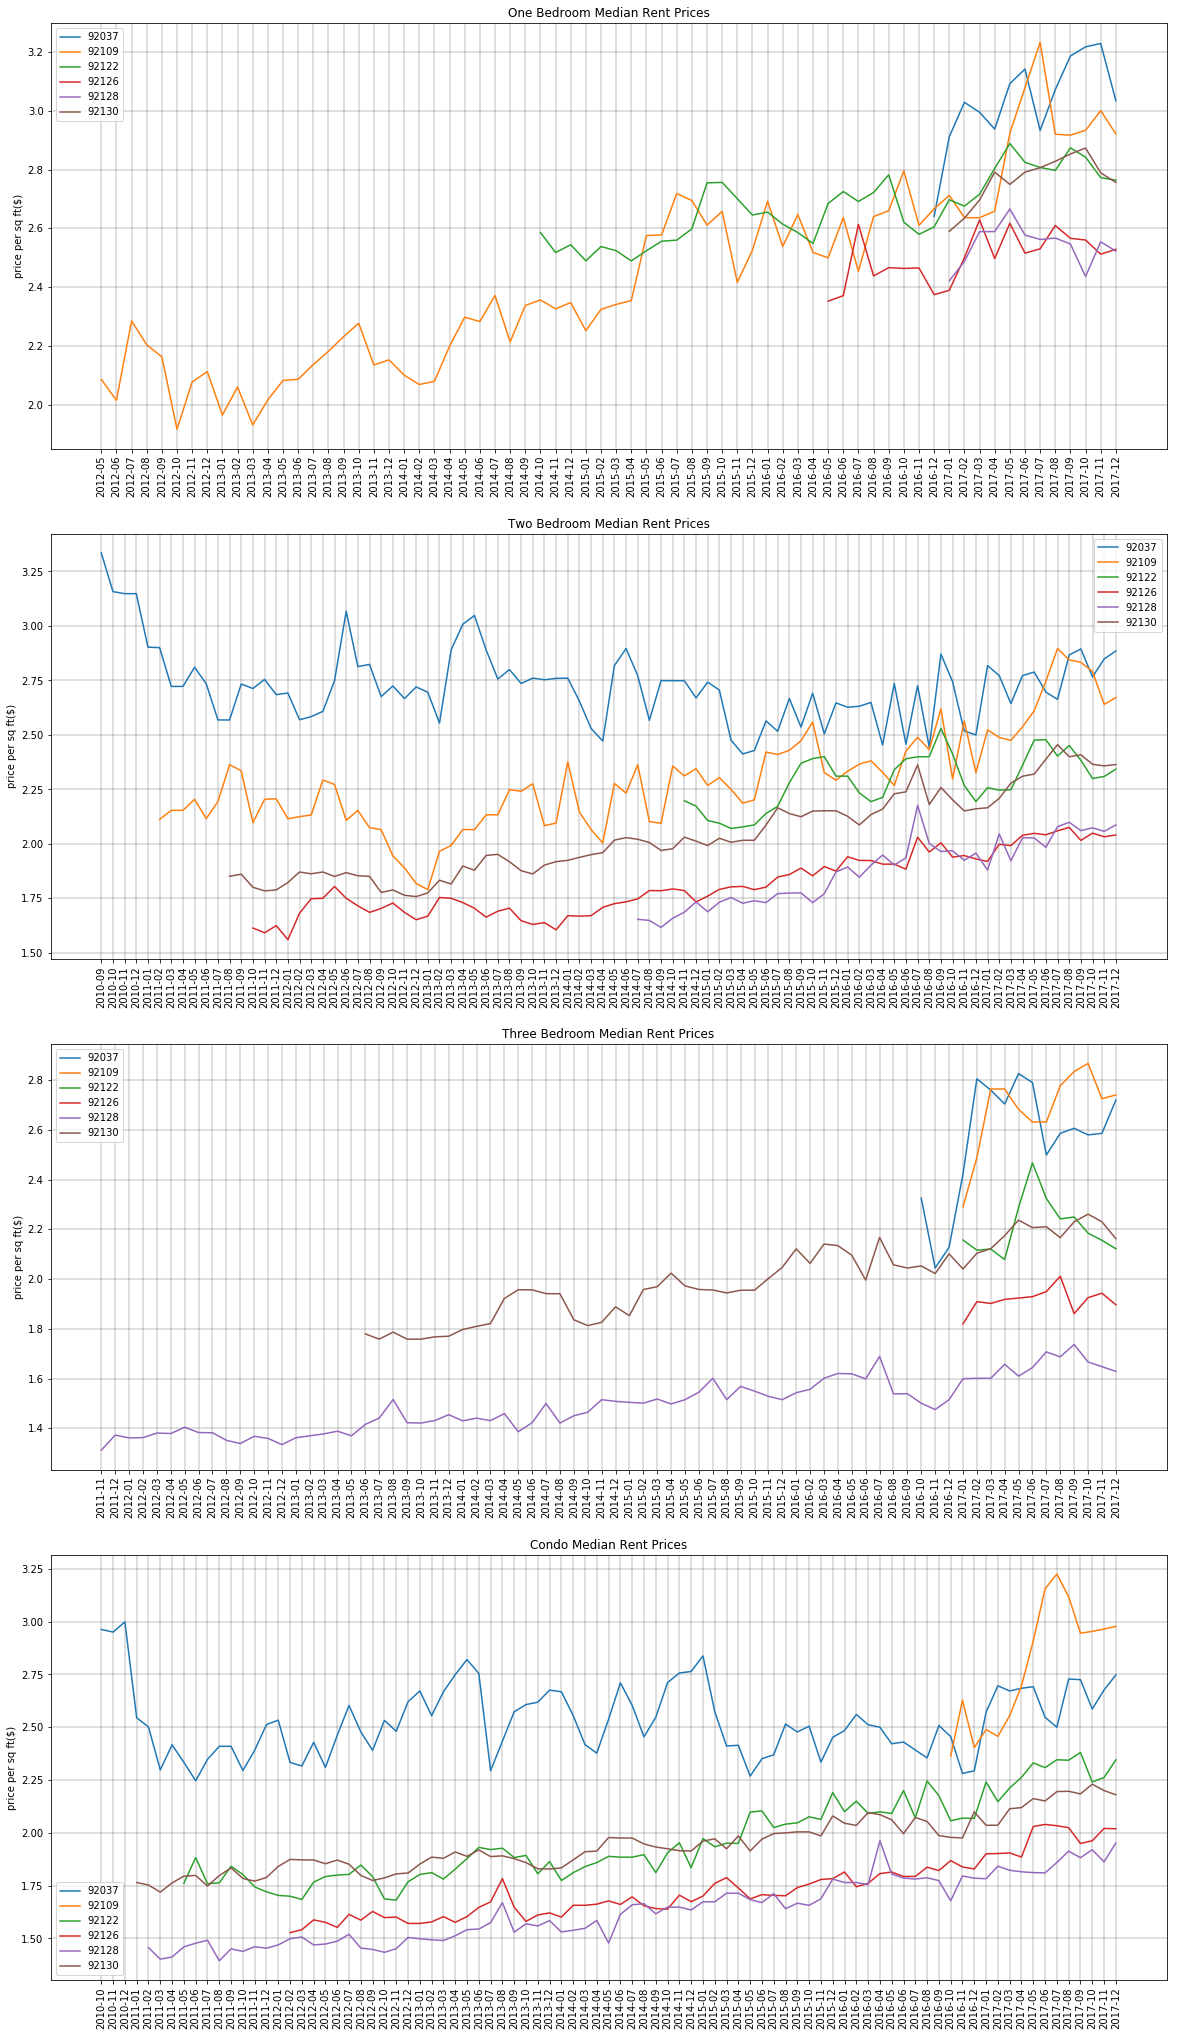

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots

dflist=[df1,df2,df3,df4]

#create a large-enough matplotlib subplot
fig,axes = subplots(len(dflist),1)
fig.set_size_inches(len(dflist)*5, len(dflist)*9)

def plotdata(dflist):
    '''
    create subplot figure then plot the values for
    each column in each dataframe in a given list
    also, set x-axis tick marks, a y-axis label,
    and a legend for each subplot
    
    :param:  dflist
    :type: list of dataframes
    '''
    assert isinstance(dflist, list)
    assert len(dflist) > 1
    
    i=0

    for df in dflist:
        assert isinstance(dflist[i],pd.DataFrame)
        x0=df.iloc[0,1:].tolist()
        x1=df.iloc[1,1:].tolist()
        x2=df.iloc[2,1:].tolist()
        x3=df.iloc[3,1:].tolist()
        x4=df.iloc[4,1:].tolist()
        x5=df.iloc[5,1:].tolist()

        months=list(df)[1:]
        axes[i].plot(x0)
        axes[i].plot(x1)
        axes[i].plot(x2)
        axes[i].plot(x3)
        axes[i].plot(x4)
        axes[i].plot(x5)
        
        axes[i].set_xticks(range(len(months)))
        axes[i].set_xticklabels(i for i in months)
        axes[i].set_ylabel('price per sq ft($)')
        axes[i].grid(color='k', linestyle='-', linewidth=0.25)
        axes[i].legend(zips,loc='best')

        for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)
            
        i+=1
            
#have to manually set titles
axes[0].set_title('One Bedroom Median Rent Prices')
axes[1].set_title('Two Bedroom Median Rent Prices')
axes[2].set_title('Three Bedroom Median Rent Prices')
axes[3].set_title('Condo Median Rent Prices')

#display final plot
plotdata(dflist)
plt.show()

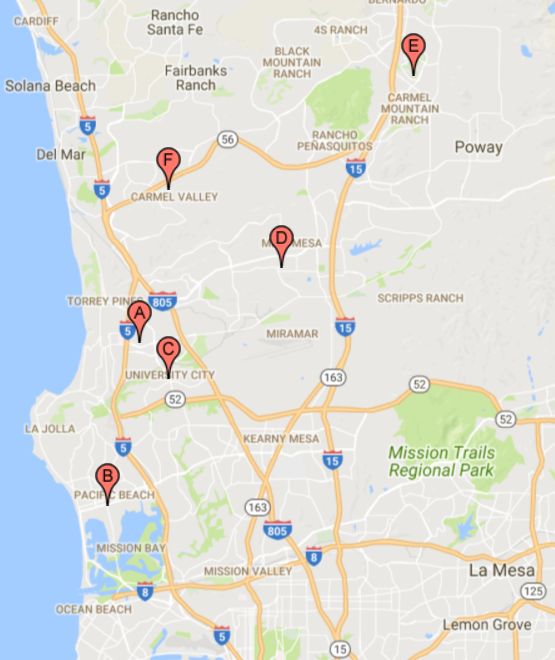

In [1]:
#display the six zip codes from the chart above in numerical order
from IPython.display import Image
img = 'zips.png'
Image(filename=img)

Some basic conclusions we can find right away is that the most expensive two zip codes in this subset are 92037 and 92019. As seen in the map from the above cell, they correspond to the La Jolla area and Pacific Beach, respectively. In addition, there seems to be a slight overall increase in the average price over the years, with a fair amount of variance.

What's more interesting is that quite a few price spikes seemingly coincide with the warmer getting warmer so it would be interesting to look at median prices for each season, where winter is (December, Januaray, February), spring is (March, April, May), summer is (June, July, August), and fall is (September, October, November).